# Customer Personality Analysis

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
customer = pd.read_excel("marketing_campaign.xlsx")
customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
# Removing Id column
customer.drop(columns=["ID","Year_Birth","Dt_Customer",], inplace= True)
customer

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,46,709,43,182,42,...,5,0,0,0,0,0,0,3,11,0
2236,PhD,Together,64014.0,2,1,56,406,0,30,0,...,7,0,0,0,1,0,0,3,11,0
2237,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,...,6,0,1,0,0,0,0,3,11,0
2238,Master,Together,69245.0,0,1,8,428,30,214,80,...,3,0,0,0,0,0,0,3,11,0


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2240 non-null   int64  
 4   Teenhome             2240 non-null   int64  
 5   Recency              2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  MntGoldProds         2240 non-null   int64  
 12  NumDealsPurchases    2240 non-null   int64  
 13  NumWebPurchases      2240 non-null   int64  
 14  NumCatalogPurchases  2240 non-null   int64  
 15  NumStorePurchases    2240 non-null   i

In [5]:
customer.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
missing=customer.groupby(["Education","Marital_Status"])["Income"].transform("mean").round(0)
customer["Income"].fillna(missing, inplace= True)

In [7]:
customer.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,52248.747768,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,25039.981164,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
# Check duplicates
customer.duplicated().sum()

182

In [9]:
# Remove duplicate values
customer.drop_duplicates(inplace=True)

In [10]:
customer.shape

(2058, 26)

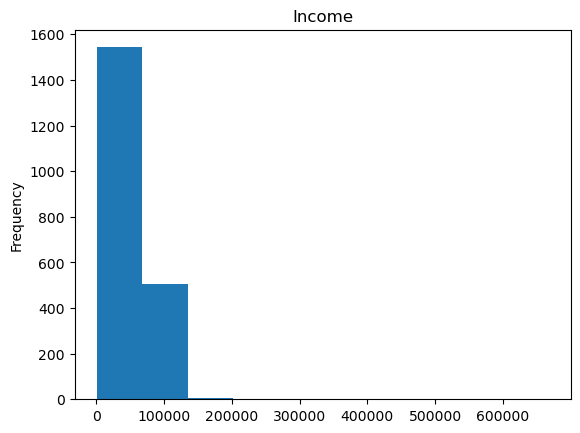

In [11]:
customer["Income"].plot(kind="hist")
plt.title('Income')
plt.show()

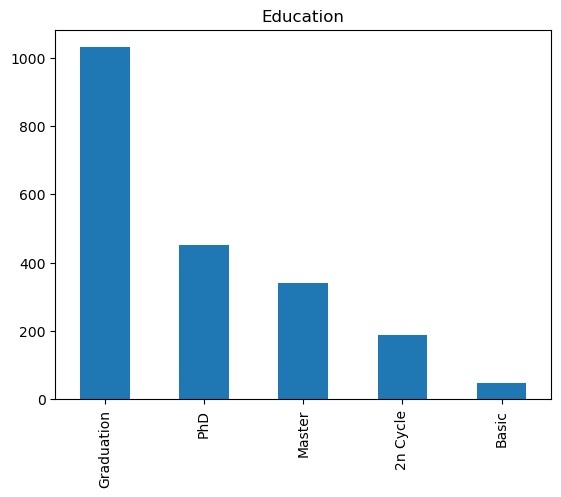

In [12]:
customer["Education"].value_counts().plot(kind= "bar")
plt.title('Education')
plt.show()

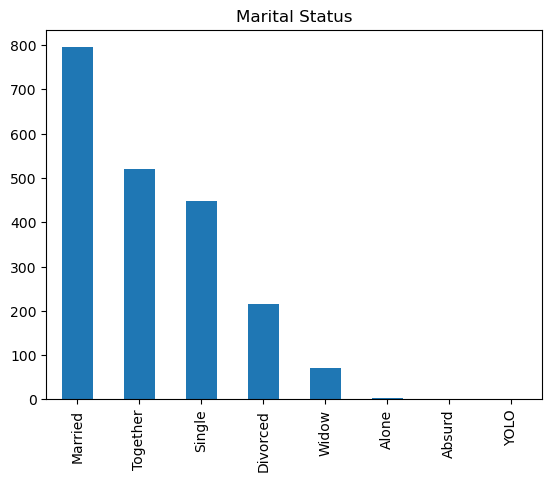

In [13]:
customer["Marital_Status"].value_counts().plot(kind= "bar")
plt.title('Marital Status')
plt.show()

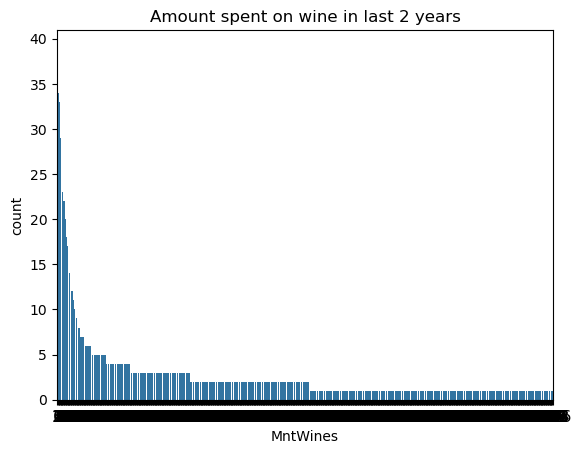

In [14]:
sns.countplot(x='MntWines', data= customer, order= customer['MntWines'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Amount spent on wine in last 2 years')
plt.show()

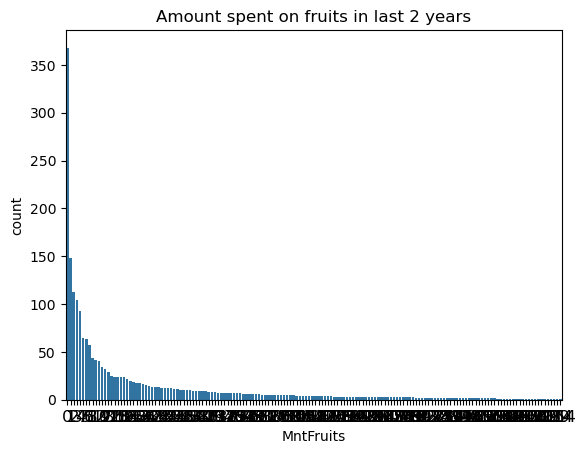

In [15]:
sns.countplot(x='MntFruits', data= customer, order= customer['MntFruits'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Amount spent on fruits in last 2 years')
plt.show()

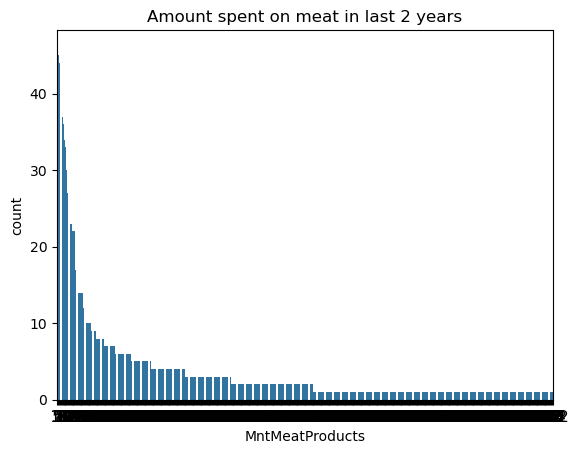

In [16]:
sns.countplot(x='MntMeatProducts', data= customer, order= customer['MntMeatProducts'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Amount spent on meat in last 2 years')
plt.show()

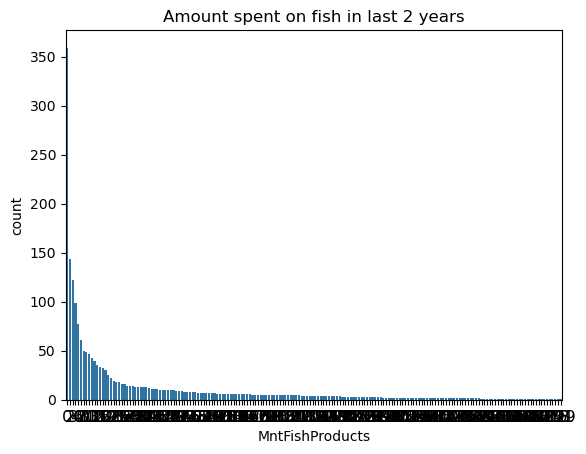

In [17]:
sns.countplot(x='MntFishProducts', data= customer, order= customer['MntFishProducts'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Amount spent on fish in last 2 years')
plt.show()

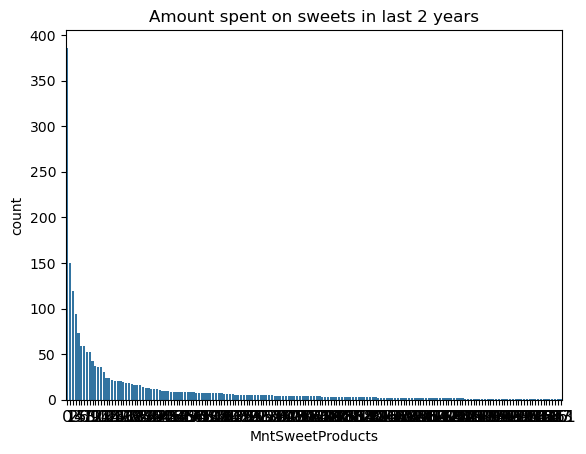

In [18]:
sns.countplot(x='MntSweetProducts', data= customer, order= customer['MntSweetProducts'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Amount spent on sweets in last 2 years')
plt.show()

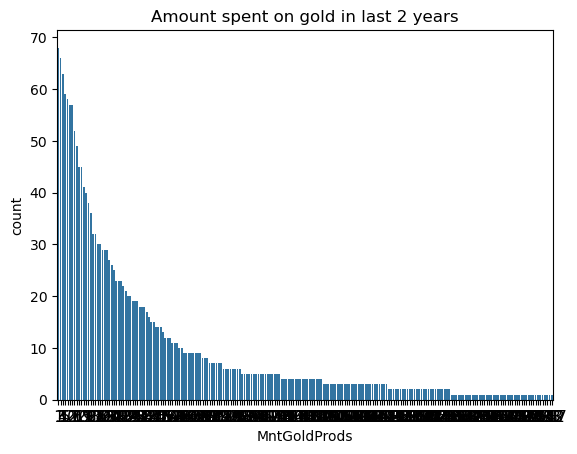

In [19]:
sns.countplot(x='MntGoldProds', data= customer, order= customer['MntGoldProds'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Amount spent on gold in last 2 years')
plt.show()

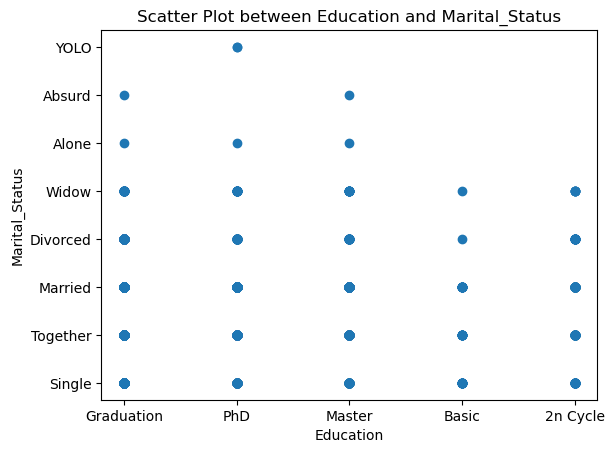

In [20]:
plt.scatter(customer['Education'], customer['Marital_Status'])
plt.xlabel('Education')
plt.ylabel('Marital_Status')
plt.title('Scatter Plot between Education and Marital_Status')
plt.show()

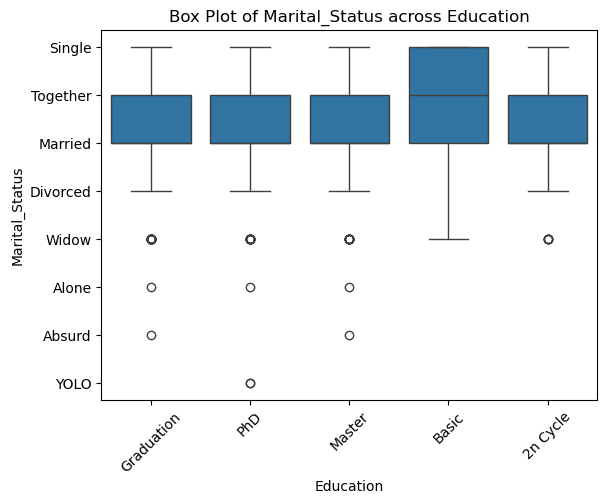

In [21]:
sns.boxplot(x='Education', y='Marital_Status', data=customer)
plt.xlabel('Education')
plt.ylabel('Marital_Status')
plt.title('Box Plot of Marital_Status across Education')
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap

<Axes: >

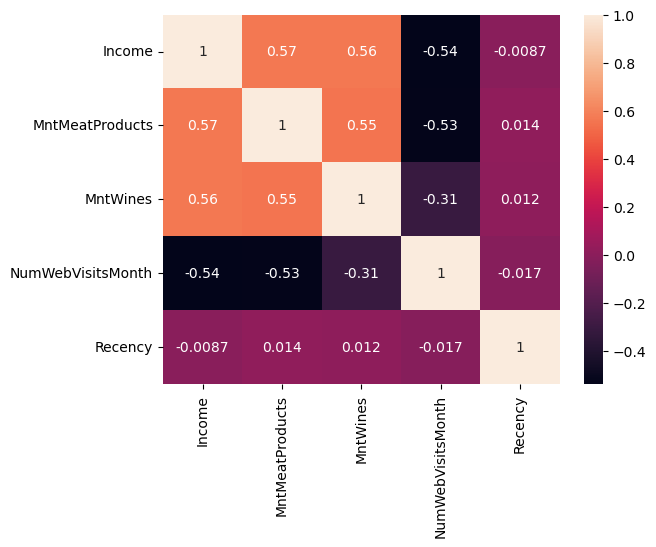

In [22]:
sns.heatmap(customer[['Income','Education','Marital_Status','MntMeatProducts','MntWines','NumWebVisitsMonth','Recency']].corr(), annot=True)

Text(0.5, 1.0, 'Income')

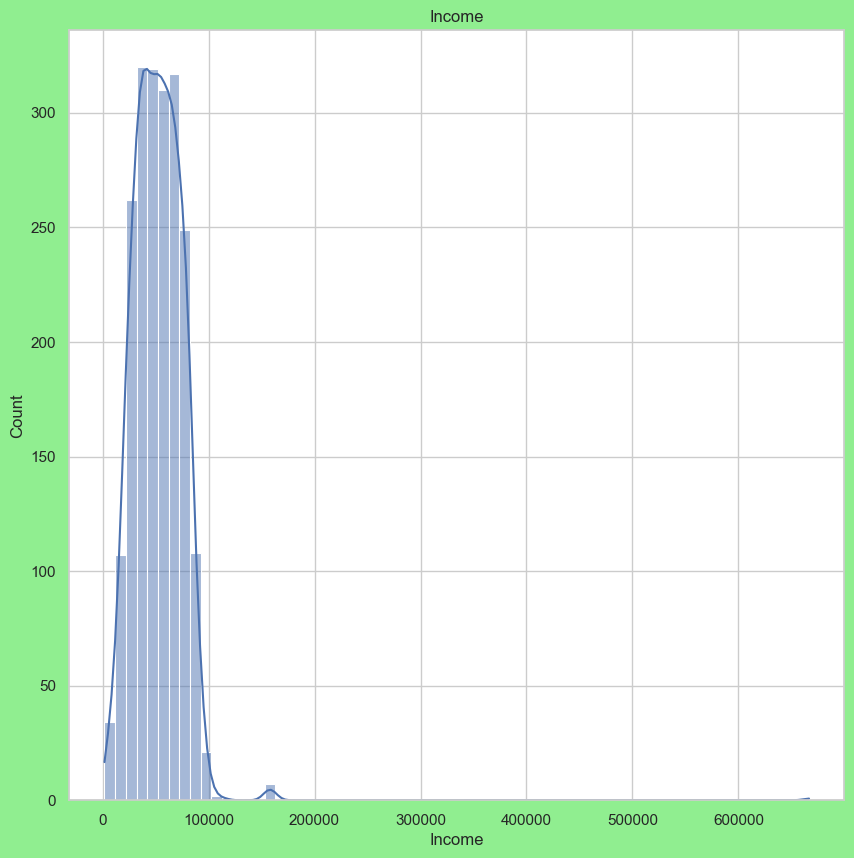

In [23]:
plt.figure(figsize=(10,10), facecolor='lightgreen')
sns.set(style='whitegrid')
ax = sns.histplot(data=customer, x='Income', binwidth=10000, kde=True)
ax.set_title('Income')

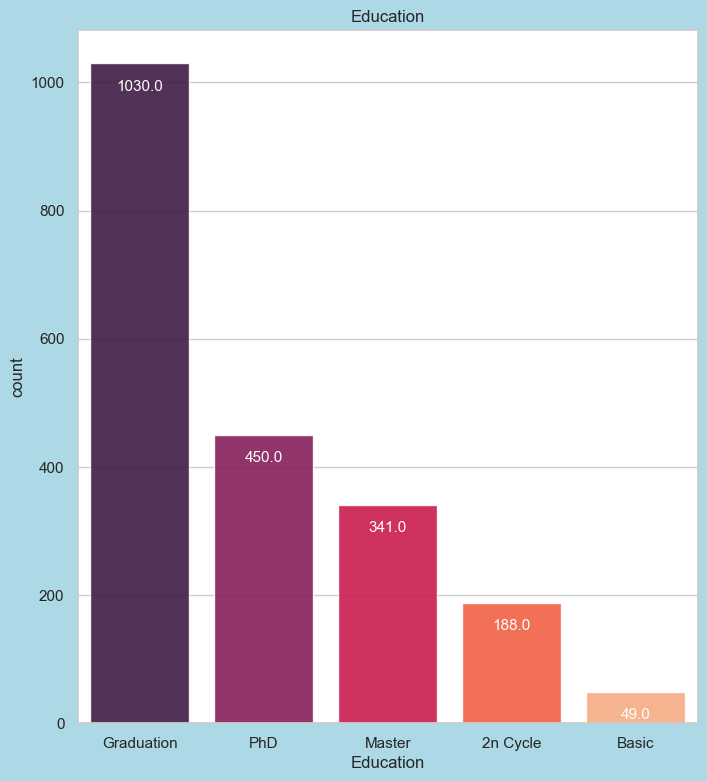

In [24]:
plt.figure(figsize=(8, 9), facecolor='lightblue')
sns.set(style='whitegrid')
ax = sns.countplot(data=customer, x='Education', saturation=1, alpha=0.9, palette='rocket', order=customer['Education'].value_counts().index)
ax.set_title('Education')
for p in ax.patches:
 ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=11)
plt.show()

Text(0, 5, '2')

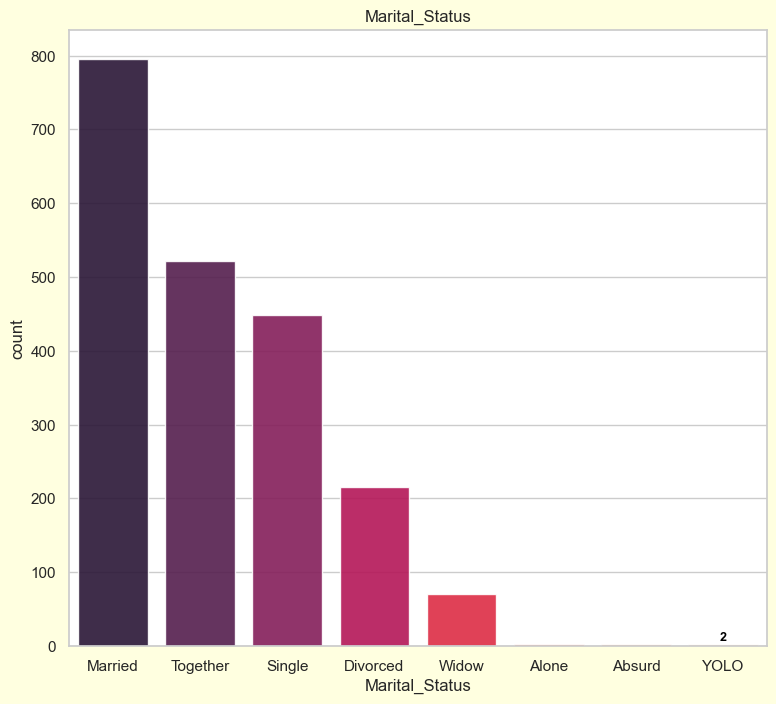

In [25]:
plt.figure(figsize=(9, 8), facecolor='lightyellow')
sns.set(style='whitegrid')
ax = sns.countplot(data=customer, x='Marital_Status', saturation=1, alpha=0.9, palette='rocket', order=customer['Marital_Status'].value_counts().index)
ax.set_title('Marital_Status')
for p in ax.patches:
 number = '{}'.format(p.get_height().astype('int64'))
ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
xytext=(0,5), textcoords='offset points', color='black', fontweight='semibold', fontsize=9)

Text(-49, 0, '625471')

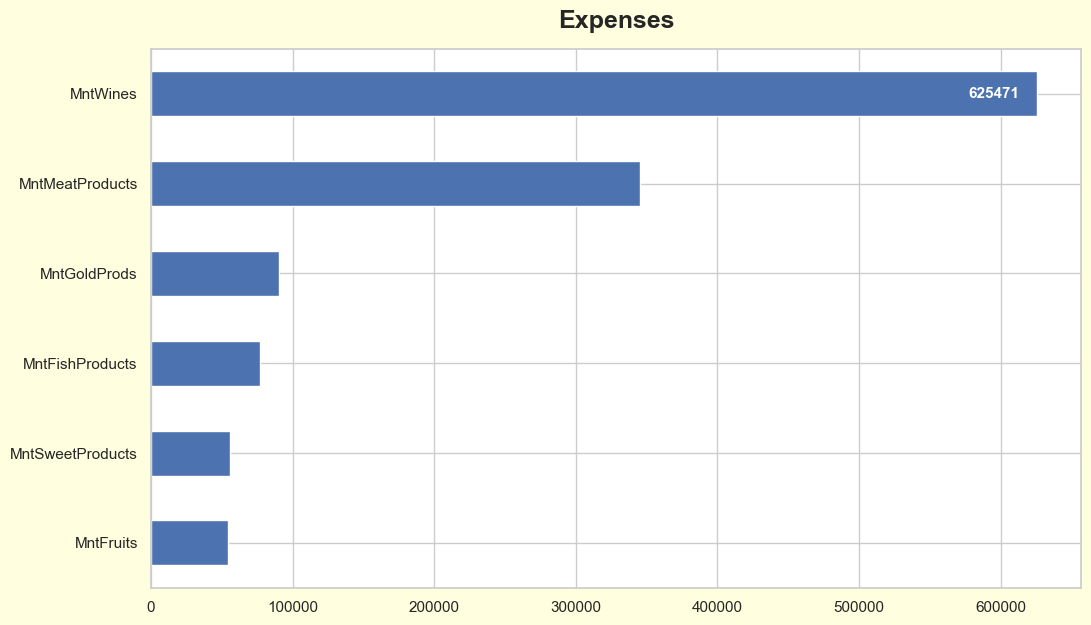

In [26]:
plt.figure(figsize=(12,7), facecolor='lightyellow')
ax = customer[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Expenses', pad=15, fontsize=18, fontweight='semibold')
rects = ax.patches
for rect in rects:
 x_value = rect.get_width()
 y_value = rect.get_y() + rect.get_height() / 2
plt.annotate('{}'.format(x_value), (x_value, y_value), xytext=(-49, 0),
textcoords='offset points', va='center', ha='left', color = 'white', fontsize=11, fontweight='semibold')

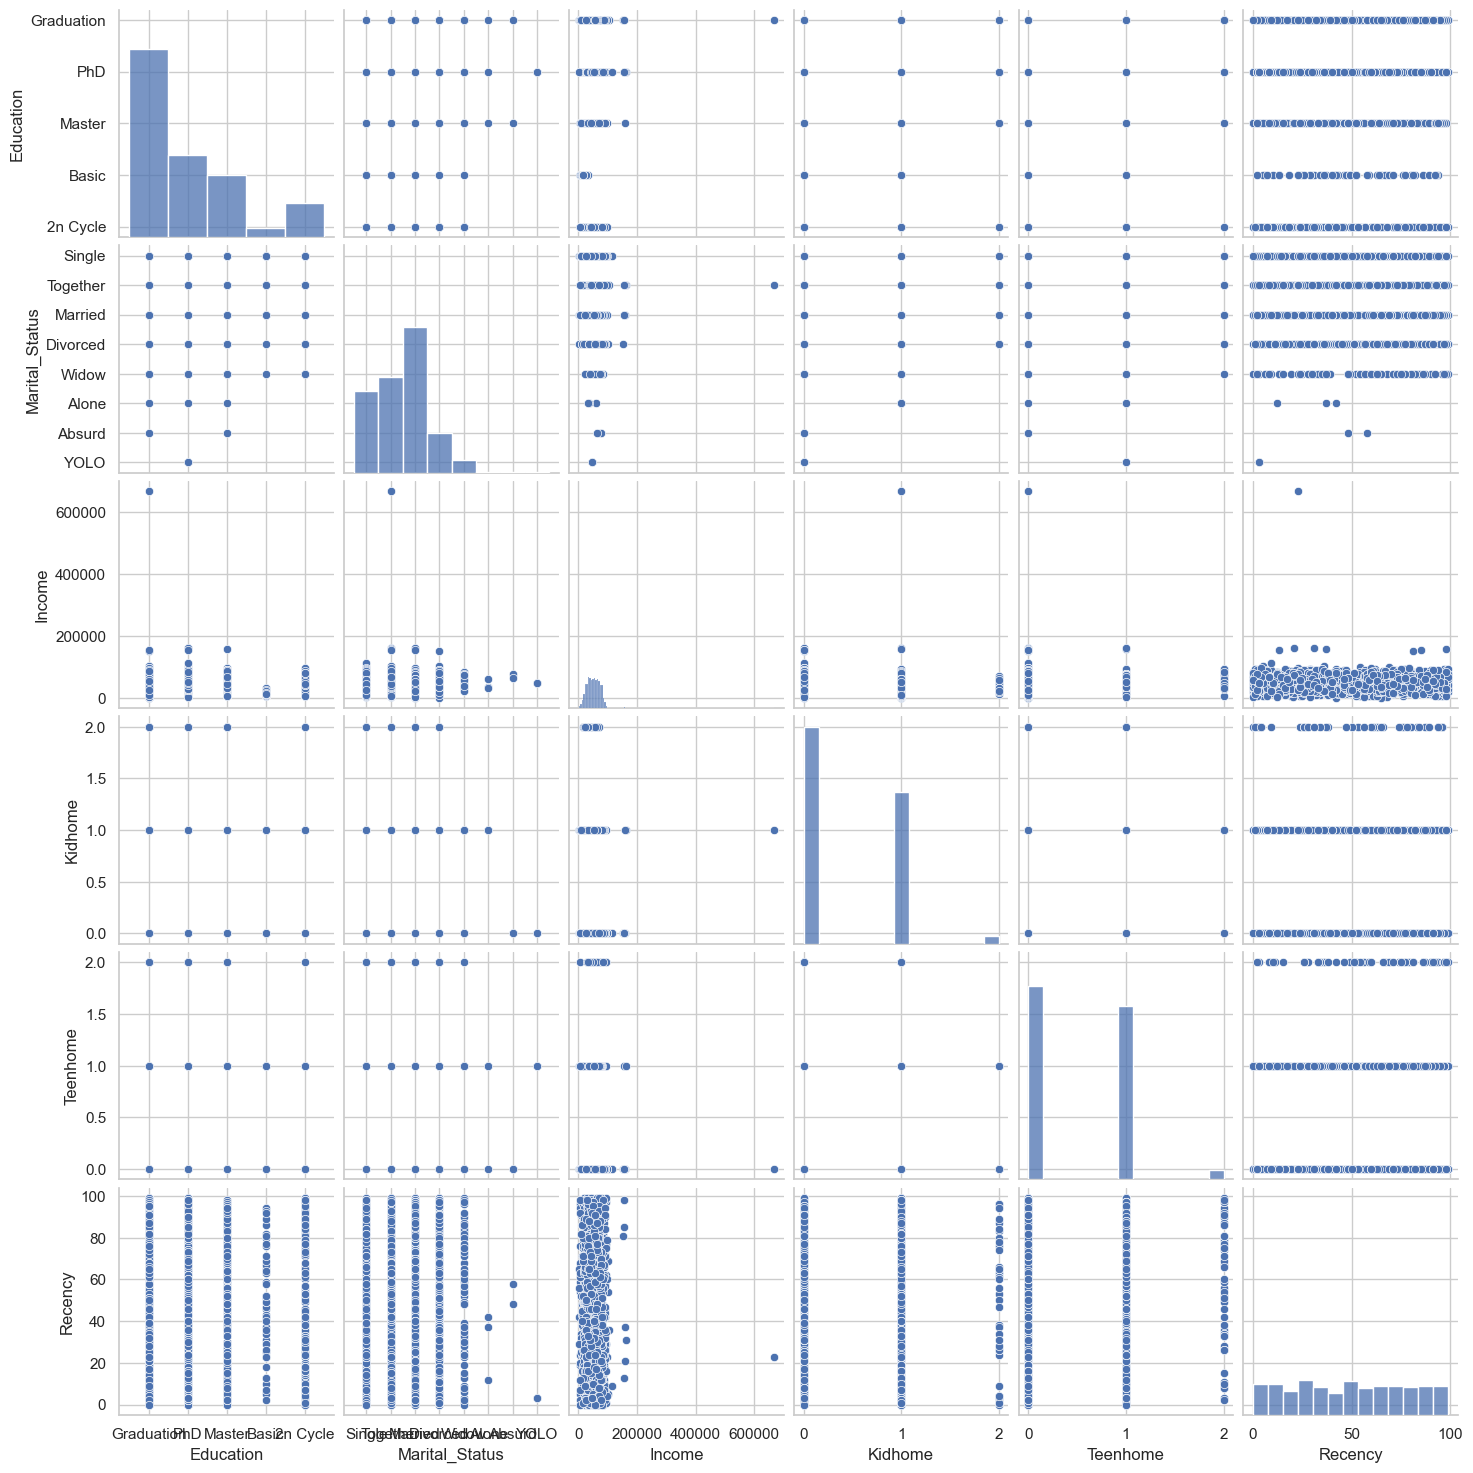

In [27]:
# Pairplot
sns.pairplot(customer,vars=['Education','Marital_Status','Income','Kidhome','Teenhome','Recency'])

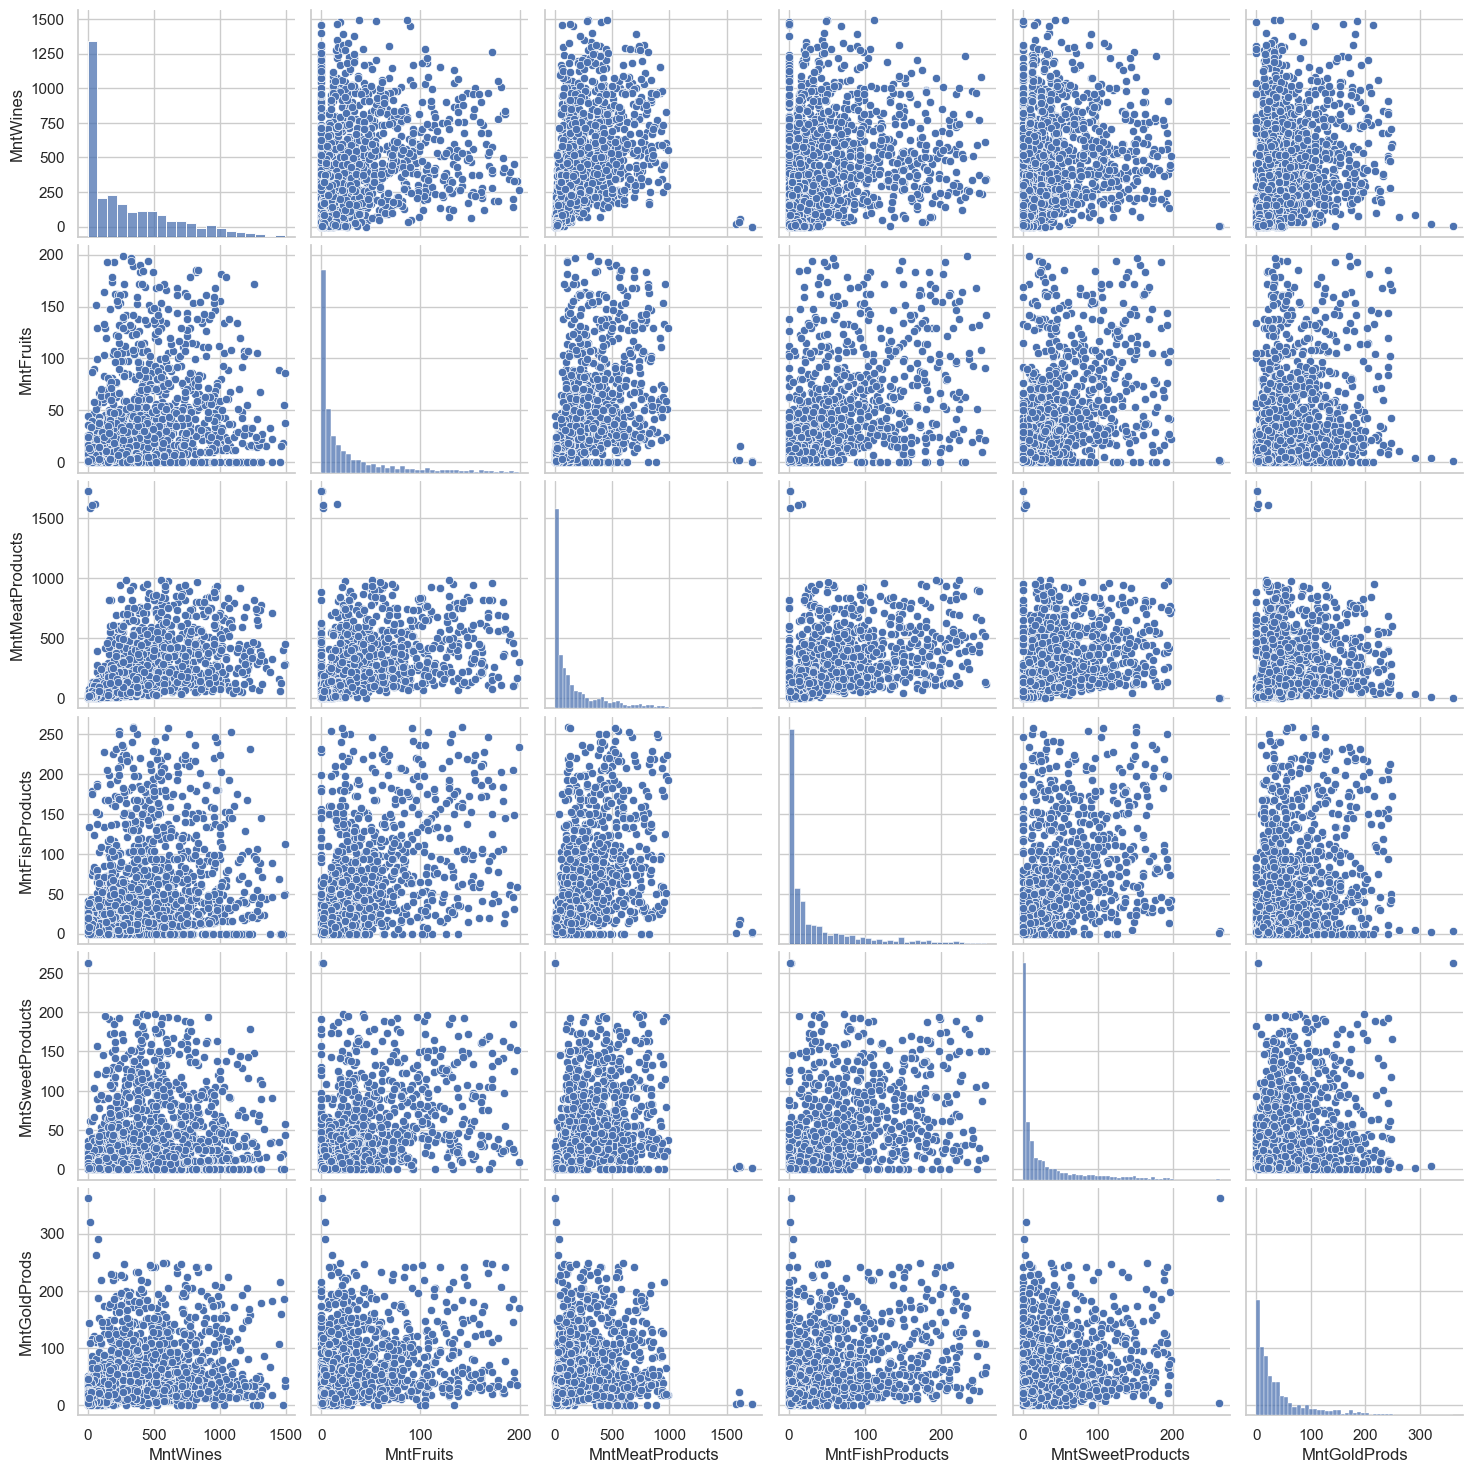

In [28]:
sns.pairplot(customer,vars=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'])

In [29]:
#Encoding Categorical Variable Education and Marital_Status
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
customer['Education'] = np.array(LE1.fit_transform(customer['Education']))
customer['Marital_Status'] = np.array(LE1.fit_transform(customer['Marital_Status']))

In [30]:
customer

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,2,4,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2,4,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,2,5,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,2,5,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,4,3,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2,5,666666.0,1,0,23,9,14,18,8,...,6,0,0,0,0,0,0,3,11,0
2235,2,3,61223.0,0,1,46,709,43,182,42,...,5,0,0,0,0,0,0,3,11,0
2237,2,2,56981.0,0,0,91,908,48,217,32,...,6,0,1,0,0,0,0,3,11,0
2238,3,5,69245.0,0,1,8,428,30,214,80,...,3,0,0,0,0,0,0,3,11,0


# Outliers Detection

In [31]:
customer.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# Data Preprocessing

# Standardizing the Data

In [32]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer)
# statistics of scaled data
pd.DataFrame(customer_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,...,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2.058000e+03,2058.0,2058.0,2.058000e+03
mean,-2.416812e-17,9.063045e-17,-3.193644e-17,3.970477e-17,1.381035e-17,-9.926192e-17,-4.876781e-17,-1.726294e-17,3.797847e-17,-2.589441e-17,...,-5.869401e-17,-1.018514e-16,-1.467350e-17,7.940954e-17,-3.452589e-17,8.631472e-18,4.833624e-17,0.0,0.0,-2.762071e-17
std,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,...,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,1.000243e+00,0.0,0.0,1.000243e+00
min,-2.124603e+00,-3.459520e+00,-1.995293e+00,-8.290973e-01,-9.320509e-01,-1.688454e+00,-9.033288e-01,-6.601406e-01,-7.347479e-01,-6.831398e-01,...,-2.180830e+00,-2.813929e-01,-2.883711e-01,-2.783647e-01,-2.649581e-01,-1.131162e-01,-9.906333e-02,0.0,0.0,-4.235205e-01
25%,-3.515159e-01,-6.700364e-01,-6.564408e-01,-8.290973e-01,-9.320509e-01,-8.606434e-01,-8.349673e-01,-6.349777e-01,-6.646486e-01,-6.282389e-01,...,-9.509756e-01,-2.813929e-01,-2.883711e-01,-2.783647e-01,-2.649581e-01,-1.131162e-01,-9.906333e-02,0.0,0.0,-4.235205e-01
50%,-3.515159e-01,2.597916e-01,-3.251905e-02,-8.290973e-01,-9.320509e-01,1.659241e-03,-3.861588e-01,-4.588375e-01,-4.412072e-01,-4.635363e-01,...,2.788785e-01,-2.813929e-01,-2.883711e-01,-2.783647e-01,-2.649581e-01,-1.131162e-01,-9.906333e-02,0.0,0.0,-4.235205e-01
75%,5.350278e-01,1.189620e+00,6.260152e-01,1.031625e+00,8.982552e-01,8.639618e-01,5.946808e-01,1.702346e-01,2.707384e-01,2.318749e-01,...,6.888298e-01,-2.813929e-01,-2.883711e-01,-2.783647e-01,-2.649581e-01,-1.131162e-01,-9.906333e-02,0.0,0.0,-4.235205e-01
max,1.421572e+00,3.049275e+00,2.421034e+01,2.892347e+00,2.728561e+00,1.726264e+00,3.534227e+00,4.347274e+00,6.822829e+00,4.056636e+00,...,6.018197e+00,3.553750e+00,3.467754e+00,3.592409e+00,3.774181e+00,8.840466e+00,1.009455e+01,0.0,0.0,2.361161e+00


# Normalizing the data

In [33]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
norm_customer = minmax.fit_transform(customer)
pd.DataFrame(norm_customer).describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,...,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.0,2058.0,2058.000000
mean,0.599125,0.531515,0.076140,0.222789,0.254616,0.494464,0.203564,0.131833,0.097220,0.144129,...,0.265986,0.073372,0.076774,0.071914,0.065598,0.012634,0.009718,0.0,0.0,0.152089
std,0.282063,0.153676,0.038169,0.268778,0.273245,0.292921,0.225404,0.199752,0.132350,0.211032,...,0.121995,0.260810,0.266297,0.258409,0.247638,0.111714,0.098124,0.0,0.0,0.359195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.500000,0.428571,0.051090,0.000000,0.000000,0.242424,0.015405,0.005025,0.009275,0.011583,...,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.500000,0.571429,0.074899,0.000000,0.000000,0.494949,0.116544,0.040201,0.038841,0.046332,...,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,0.750000,0.714286,0.100028,0.500000,0.500000,0.747475,0.337575,0.165829,0.133043,0.193050,...,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


# PCA

In [34]:
from sklearn.decomposition import PCA
# Applying PCA Fit Transform to dataset
pca = PCA()
pca_values = pca.fit_transform(customer_scaled)
pca_values

array([[ 3.70479882e+00, -4.91089427e-01, -2.22097548e-01, ...,
         1.00385800e-01, -7.41318275e-17,  3.06103271e-16],
       [-2.44561390e+00, -4.30155083e-01,  1.48742438e-01, ...,
        -1.01299070e-01, -2.53810211e-16,  1.35549709e-16],
       [ 1.60778564e+00, -7.52299999e-01, -8.28970878e-01, ...,
         2.87764411e-02,  8.78489195e-17, -7.92343629e-17],
       ...,
       [ 1.50278174e+00,  8.45622040e-01,  4.13122395e-01, ...,
        -3.04554010e-02,  2.94216350e-17,  1.33562873e-17],
       [ 1.70716731e+00,  2.33881483e-01, -1.33479942e+00, ...,
         3.82011461e-01,  6.77501902e-19, -2.13199007e-17],
       [-1.73009153e+00,  1.28516886e+00,  7.91877625e-01, ...,
         3.01892446e-01,  1.47332510e-17, -5.63355520e-18]])

# Hierarchical Clustering

In [35]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

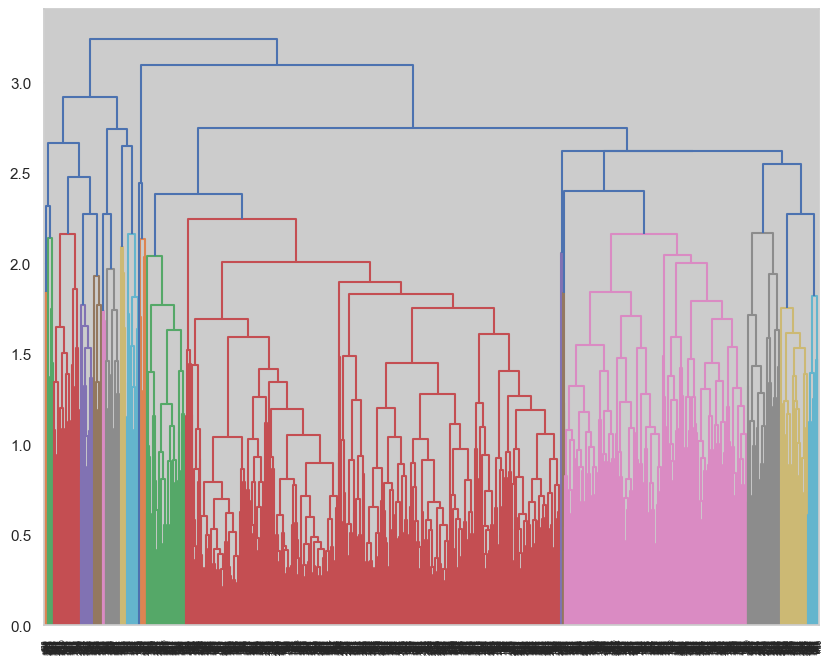

In [36]:
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(norm_customer,"complete"))

In [37]:
hclusters=AgglomerativeClustering(n_clusters=3,linkage="complete")
hclusters

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [38]:
y=pd.DataFrame(hclusters.fit_predict(norm_customer),columns=["clustersid"])
y["clustersid"].value_counts()

1    1787
0     251
2      20
Name: clustersid, dtype: int64

In [39]:
# Adding clusters to dataset
customer1=customer.copy()
customer1["clustersid"]=hclusters.labels_
customer1

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,clustersid
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,3,11,1,0
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,3,11,0,1
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,3,11,0,1
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,3,11,0,1
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2,5,666666.0,1,0,23,9,14,18,8,...,0,0,0,0,0,0,3,11,0,1
2235,2,3,61223.0,0,1,46,709,43,182,42,...,0,0,0,0,0,0,3,11,0,1
2237,2,2,56981.0,0,0,91,908,48,217,32,...,0,1,0,0,0,0,3,11,0,1
2238,3,5,69245.0,0,1,8,428,30,214,80,...,0,0,0,0,0,0,3,11,0,1


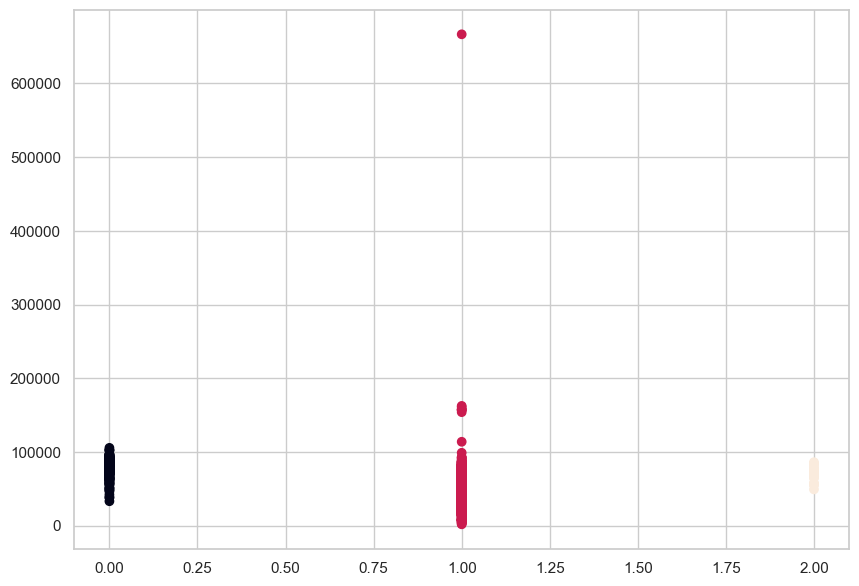

In [40]:
#Plot Clusters
plt.figure(figsize=(10,7))
plt.scatter(customer1["clustersid"],customer["Income"], c=hclusters.labels_)

# KMeans Clustering

In [41]:
from sklearn.cluster import KMeans 
# defining yhe kmeans function with initialization as k-means++
Kmeans = KMeans(n_clusters=4, init='random')
# fitting the k-means algorithm on scaled data
Kmeans.fit(pca_values)

  File "C:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


KMeans(init='random', n_clusters=4)

In [42]:
# inertia on the fitted data
Kmeans.inertia_

33542.684559433634

Text(0, 0.5, 'Intertia')

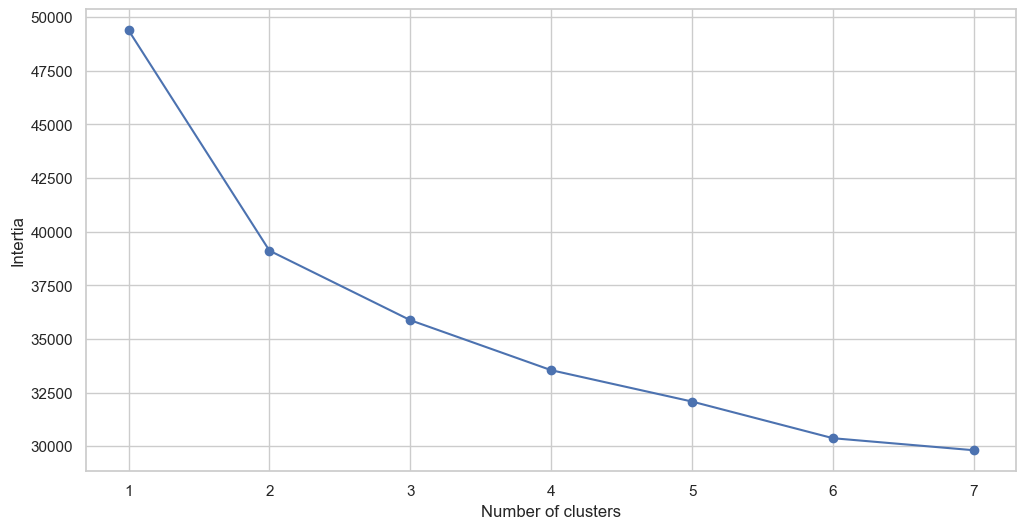

In [43]:
# fitting multiple k-means algorithm and starting the values in an empty list
SSE = []
for cluster in range (1,8):
    kmeans = KMeans(n_clusters = cluster,init='random')
    kmeans.fit(pca_values)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,8), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Intertia')

In [44]:
kmeans = KMeans(n_clusters = 3, init='random')
kmeans.fit(pca_values)
pred = kmeans.predict(pca_values)

In [45]:
frame = pd.DataFrame(pca_values)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    960
1    602
2    496
Name: cluster, dtype: int64

In [46]:
customer1['Income'].fillna(customer1['Income'].mean(), inplace=True)


In [47]:
data_prep = customer1.copy()

In [48]:
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
lenc.fit(data_prep['Marital_Status'])
data_prep['Marital_Status'] = lenc.transform(data_prep['Marital_Status'])


In [49]:
data_prep = data_prep.drop([ 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response', 'Complain', 'Z_CostContact', 'Z_Revenue'], axis=1)

In [50]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_prep)
label = kmeans.predict(data_prep)
data_segment = data_prep.copy()
data_segment['Segments'] = label

In [51]:
data_segment.groupby(['Segments']).mean()


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,clustersid
Segments,,,,,,,,,,,,,,,,,,
0,2.517413,3.736318,54290.042289,0.376866,0.793532,49.603234,318.467662,21.116915,115.815920,28.487562,20.516169,47.929104,3.029851,4.878109,2.483831,6.395522,5.473881,0.971393
1,2.468864,3.725275,79923.340659,0.073260,0.318681,48.509158,633.186813,59.734432,427.166667,86.886447,64.051282,70.935897,1.523810,5.368132,5.655678,8.315018,3.047619,0.624542
2,2.203390,3.699153,28906.350282,0.810734,0.333333,48.553672,33.478814,6.211864,26.535311,9.152542,6.303672,18.396893,2.183616,2.234463,0.552260,3.098870,6.896893,0.995763


In [52]:
frame.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
              24,        25, 'cluster'],
      dtype='object')

In [53]:
frame

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,cluster
0,3.704799,-0.491089,-0.222098,2.296977,0.110522,0.007904,-0.727566,-0.066654,-1.328145,1.252985,...,-0.530820,1.221018,0.904743,0.001745,-0.289224,-0.857849,0.100386,-7.413183e-17,3.061033e-16,2
1,-2.445614,-0.430155,0.148742,-0.504966,-0.176741,-0.305886,-0.176587,0.163543,0.166659,-0.460242,...,-0.039826,0.275570,0.072022,0.002696,-0.372643,-0.184465,-0.101299,-2.538102e-16,1.355497e-16,0
2,1.607786,-0.752300,-0.828971,-0.176787,-0.087090,-0.864128,-1.175270,0.687436,0.583850,0.085806,...,0.989853,-0.216642,0.720787,-0.630356,0.475915,-0.153727,0.028776,8.784892e-17,-7.923436e-17,1
3,-2.416962,-0.958778,0.645860,-0.020597,0.062945,-0.613191,-1.182327,0.496401,-0.285799,0.165843,...,0.052876,-0.311111,-0.109162,-0.214985,-0.086874,-0.014074,-0.063863,2.168921e-16,1.131490e-16,0
4,-0.390066,0.126149,-0.767061,-0.334241,-0.106867,1.173448,0.627466,-0.792301,-1.797050,1.311177,...,0.206727,-0.267309,-0.248216,-0.720181,0.724188,-0.359479,0.068806,1.661854e-16,1.287483e-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,4.944839,0.609433,-1.176606,-3.960249,-3.455213,-0.282978,-0.068259,1.777739,-1.218836,-1.354304,...,6.013739,5.239595,1.299649,6.863840,10.679759,-0.535570,1.715420,-1.766970e-17,-3.105366e-17,2
2054,2.324082,0.462608,-1.964138,1.537504,0.713598,-0.163172,0.201329,-0.607268,1.242814,-0.310174,...,-1.488039,0.537794,-0.654218,0.721606,-0.541232,0.066721,-1.008458,-1.818596e-17,6.705085e-18,1
2055,1.502782,0.845622,0.413122,-2.083631,1.768997,-0.073781,1.575625,-0.883407,0.054050,0.119896,...,0.908065,-0.888202,-0.065274,1.241732,-0.119748,0.062236,-0.030455,2.942163e-17,1.335629e-17,1
2056,1.707167,0.233881,-1.334799,-0.552419,-1.187370,-0.873042,-1.040512,0.935957,0.815325,-0.136700,...,0.061005,-0.280537,0.401114,-0.239647,-0.257394,-0.139535,0.382011,6.775019e-19,-2.131990e-17,1


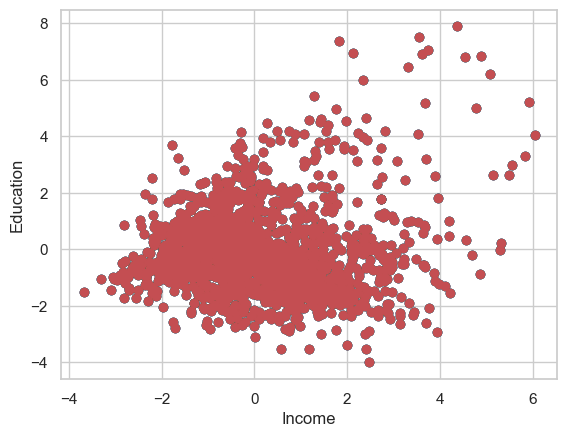

In [54]:
color=['blue','green', 'r']
for k in range(3):
    data=frame[frame['cluster']==k+1]
    plt.scatter(frame[1],frame[2],c=color[k])
# plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Education')
plt.show()

# DB Scan

<Axes: >

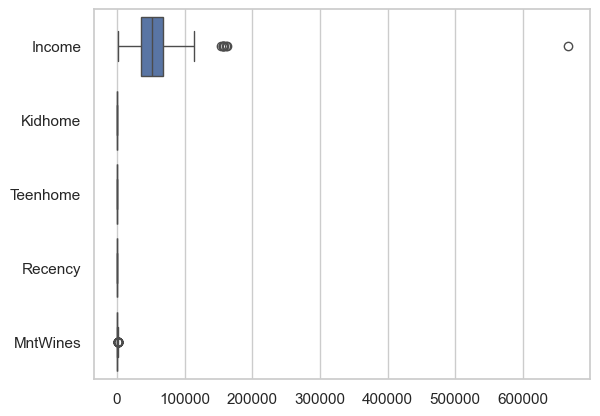

In [55]:
sns.boxplot(customer[['Income','Kidhome','Teenhome','Recency','MntWines']],orient='h')

In [56]:
from sklearn.cluster import DBSCAN
dbscan=customer
dbscan

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,2,4,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2,4,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,2,5,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,2,5,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,4,3,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,2,5,666666.0,1,0,23,9,14,18,8,...,6,0,0,0,0,0,0,3,11,0
2235,2,3,61223.0,0,1,46,709,43,182,42,...,5,0,0,0,0,0,0,3,11,0
2237,2,2,56981.0,0,0,91,908,48,217,32,...,6,0,1,0,0,0,0,3,11,0
2238,3,5,69245.0,0,1,8,428,30,214,80,...,3,0,0,0,0,0,0,3,11,0


In [57]:
db=DBSCAN(eps=6,min_samples=4,metric='euclidean')
db

DBSCAN(eps=6, min_samples=4)

In [58]:
model=db.fit(dbscan)

In [59]:
label=model.labels_
label

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [60]:
db=DBSCAN(eps=2,min_samples=4,metric='euclidean')
db

DBSCAN(eps=2, min_samples=4)

In [61]:
model=db.fit(dbscan)

In [62]:
label=model.labels_
label

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [63]:
from sklearn import metrics
# identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True
#Calculating the number of clusters
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No. of clusters:',n_clusters)

No. of clusters: 0


# Model Building and Model Evaluation

In [64]:
# Dividing our data into input and output variables
X = frame.iloc[:,0:12]
Y = frame.iloc[:,-1]

In [65]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,linkage='complete')
Y = cluster.fit_predict(X)

In [66]:
Y_new = pd.DataFrame(Y)
Y_new[0].value_counts()

0    1357
2     681
1      20
Name: 0, dtype: int64

In [67]:
Y

array([2, 0, 2, ..., 2, 0, 0], dtype=int64)

In [68]:

customer["Y"] = Y
customer.head(50)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Y
0,2,4,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,0,3,11,1,2
1,2,4,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,0,3,11,0,0
2,2,5,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,0,3,11,0,2
3,2,5,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,0,3,11,0,0
4,4,3,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,0,3,11,0,0
5,3,5,62513.0,0,1,16,520,42,98,0,...,0,0,0,0,0,0,3,11,0,0
6,2,2,55635.0,0,1,34,235,65,164,50,...,0,0,0,0,0,0,3,11,0,2
7,4,3,33454.0,1,0,32,76,10,56,3,...,0,0,0,0,0,0,3,11,0,0
8,4,5,30351.0,1,0,19,14,0,24,3,...,0,0,0,0,0,0,3,11,1,0
9,4,5,5648.0,1,1,68,28,0,6,1,...,1,0,0,0,0,0,3,11,0,0


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=1000)

# Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
# Logistic regression and fit the model
classifier_lr = LogisticRegression(multi_class='multinomial')
classifier_lr.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial')

In [71]:
classifier_lr.score(X_train,Y_train)

0.9384316267012314

In [72]:
classifier_lr.score(X_test,Y_test)

0.9436893203883495

In [73]:
#Predict for X dataset
# pickle.load(open(filename, 'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = classifier_lr.predict(X_train)

In [74]:
y_pred_df = pd.DataFrame({'actual': Y_train,'predicted':y_pred})

In [75]:
y_pred_df.head(20)

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [76]:
#confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_train,y_pred)
print(confusion_matrix)

[[983   0  43]
 [  0  16   0]
 [ 52   0 449]]


In [77]:
#Classification report
## Precision - what percent of your predictions were correct?
## Recall - what percent of te positive cases did you catch?
## F1 score - what percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(Y_train,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1026
           1       1.00      1.00      1.00        16
           2       0.91      0.90      0.90       501

    accuracy                           0.94      1543
   macro avg       0.95      0.95      0.95      1543
weighted avg       0.94      0.94      0.94      1543



# Gaussian Naive Bayes

In [78]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier_nb = GaussianNB()  
classifier_nb.fit(X_train,Y_train) 

GaussianNB()

In [79]:
classifier_nb.score(X_train,Y_train)

0.8950097213220998

In [80]:
classifier_nb.score(X_test,Y_test)

0.9009708737864077

In [81]:
#Predict for X dataset
# pickle.load(open(filename, 'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = classifier_nb.predict(X_train)

In [82]:
y_pred_df = pd.DataFrame({'actual': Y_train,'predicted':y_pred})

In [83]:
y_pred_df.head(15)

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [84]:
#confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_train,y_pred)
print(confusion_matrix)

[[953   0  73]
 [  0  16   0]
 [ 89   0 412]]


In [85]:
#Classification report
## Precision - what percent of your predictions were correct?
## Recall - what percent of te positive cases did you catch?
## F1 score - what percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(Y_train,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1026
           1       1.00      1.00      1.00        16
           2       0.85      0.82      0.84       501

    accuracy                           0.90      1543
   macro avg       0.92      0.92      0.92      1543
weighted avg       0.89      0.90      0.89      1543



# Decision Tree

In [86]:


#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier_DT= DecisionTreeClassifier(criterion='gini', random_state=0)  
classifier_DT.fit(X_train, Y_train)  

DecisionTreeClassifier(random_state=0)

In [87]:
classifier_DT.score(X_train,Y_train)

1.0

In [88]:
classifier_DT.score(X_test,Y_test)

0.9495145631067962

In [89]:
#Predict for X dataset
# pickle.load(open(filename, 'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = classifier_nb.predict(X_train)

In [90]:
y_pred_df = pd.DataFrame({'actual': Y_train,'predicted':y_pred})

In [91]:
y_pred_df.tail(20)

,actual,predicted
1523,0,0
1524,2,2
1525,0,0
1526,0,0
1527,0,0
1528,2,2
1529,0,0
1530,0,0
1531,0,0
1532,0,0


In [92]:
#confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_train,y_pred)
print(confusion_matrix)

[[953   0  73]
 [  0  16   0]
 [ 89   0 412]]


In [93]:
#Classification report
## Precision - what percent of your predictions were correct?
## Recall - what percent of te positive cases did you catch?
## F1 score - what percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(Y_train,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1026
           1       1.00      1.00      1.00        16
           2       0.85      0.82      0.84       501

    accuracy                           0.90      1543
   macro avg       0.92      0.92      0.92      1543
weighted avg       0.89      0.90      0.89      1543



# KNN

In [94]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier(n_neighbors=5, metric='minkowski')  
classifier_knn.fit(X_train, Y_train) 

KNeighborsClassifier()

In [95]:
classifier_knn.score(X_train,Y_train)

0.9760207388204796

In [96]:
classifier_knn.score(X_test,Y_test)

0.9728155339805825

In [97]:
#Predict for X dataset
# pickle.load(open(filename, 'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = classifier_nb.predict(X_train)

In [98]:
y_pred_df = pd.DataFrame({'actual': Y_train,'predicted':y_pred})

In [99]:
y_pred_df.tail()

,actual,predicted
1538,0,0
1539,0,0
1540,2,2
1541,0,0
1542,0,0


In [100]:
#confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_train,y_pred)
print(confusion_matrix)

[[953   0  73]
 [  0  16   0]
 [ 89   0 412]]


In [112]:
#Classification report
## Precision - what percent of your predictions were correct?
## Recall - what percent of te positive cases did you catch?
## F1 score - what percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(Y_train,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1026
           1       1.00      1.00      1.00        16
           2       0.85      0.82      0.84       501

    accuracy                           0.90      1543
   macro avg       0.92      0.92      0.92      1543
weighted avg       0.89      0.90      0.89      1543



# Support Vector Machine

In [102]:
# from sklearn.svm import SVC # "Support vector classifier" 
from sklearn.svm import SVC
classifier_svm = SVC(kernel='rbf', random_state=0)  
classifier_svm.fit(X_train, Y_train) 

SVC(random_state=0)

In [103]:
classifier_svm.score(X_train,Y_train)

0.9721322099805574

In [104]:
classifier_svm.score(X_test,Y_test)

0.9650485436893204

In [105]:
#Predict for X dataset
# pickle.load(open(filename, 'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = classifier_nb.predict(X_train)

In [106]:
y_pred_df = pd.DataFrame({'actual': Y_train,'predicted':y_pred})

In [107]:
y_pred_df.tail()

,actual,predicted
1538,0,0
1539,0,0
1540,2,2
1541,0,0
1542,0,0


In [108]:
#confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_train,y_pred)
print(confusion_matrix)

[[953   0  73]
 [  0  16   0]
 [ 89   0 412]]


In [109]:
#Classification report
## Precision - what percent of your predictions were correct?
## Recall - what percent of te positive cases did you catch?
## F1 score - what percent of positive predictions were correct?
from sklearn.metrics import classification_report
print(classification_report(Y_train,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1026
           1       1.00      1.00      1.00        16
           2       0.85      0.82      0.84       501

    accuracy                           0.90      1543
   macro avg       0.92      0.92      0.92      1543
weighted avg       0.89      0.90      0.89      1543



In [110]:
# save the model to disk
import pickle
filename = 'final_model.pkl'
pickle.dump(classifier_lr, open(filename, 'wb'))